## Model Comparison and Occam’s Razor

“Among competing hypotheses, the one with the fewest assumptions should be selected.”

Though not always, often “fewest assumptions” is equated with fewest number of model
parameters.

A) Simulation

Suppose the true nature of a signal is sinusoidal. You can then simulate measurement data that
fluctuate around

$$ytrue= \sin(kx+ φ) $$

Assume the measurement signal-to-noise ratio is 5:1. To be realistic, let’s also add an “error
floor” of 0.1. For our purpose this is necessary because yTrue can be very close to zero. Without
an error floor, this can lead to very small values for the uncertainty and, being in the denominator
in the sum for χ2, this can cause numerical instability. Adding the error floor prevents the
variance to become arbitrarily small. Thus there are two sources of uncertainty: the
measurement error (see the signal-to-noise ratio above) and the error floor. Let’s call the former
meas_err and the later err_floor. The total variance is the sum of the square of these two
quantities:

$$measerr**2 + errfloor**2 $$

Physicists call this “addition in quadrature”. The total uncertainty (or total error) is the square
root of this quantity.
For these simulated measurements, use 101 evenly-spaced points for x between 0 and 2π, with k
= 2 and φ = π/6.


In [21]:
%matplotlib inline
# All imports
from random import choice
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sp #import for curve_fit function

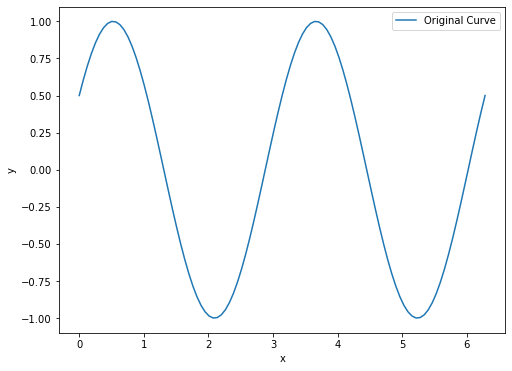

In [20]:
N = 101
k = 2
phi = np.pi/6  #0.5235
x = np.linspace(0, 2*np.pi, N)

measerr = 1/5
floorerr = 0.1
totalerr=np.sqrt((measerr**2) + (floorerr**2)) #0.2236

def sinusoid(x, k, phi):
    return np.sin((k*x) + phi)

y= sinusoid(x, k, phi) #+ y_model

plt.plot(x, y, label='Original Curve Sinusoid function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

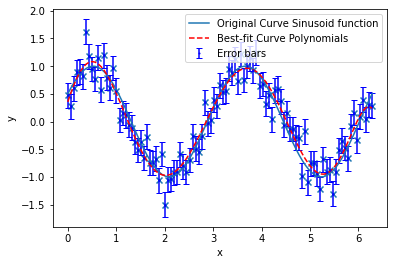

Best-fit polynomial coefficients:
[0.000 -0.012 0.170 -1.098 3.284 -3.530 -1.299 2.640 0.355]

Sinusoid Function
chi2, chi2_nu, DOF are 108.9547, 1.1006, 99.0000 respectively.

Polynomial Function
chi2_poly, chi2_nu_poly, DOF are 98.1500, 0.9914, 99.0000 respectively.


In [30]:
def poly(x, c8, c7, c6, c5, c4, c3, c2, c1, c0):
    return c0 + c1*(x**1) + c2*(x**2) + c3*(x**3) + c4*(x**4) + c5*(x**5) + c6*(x**6) + c7*(x**7) + c8*(x**8)

x_data = x
y_noise = totalerr * np.random.normal(size=x_data.size)
y_data = y + y_noise

best_fit, pcov = sp.curve_fit(poly, x_data, y_data, maxfev=1000)
    
y_model = np.polyval(best_fit, x_data)

plt.scatter(x_data, y_data, marker='x')
plt.errorbar(x_data, y_data, yerr = totalerr, fmt = 'ob', ms = 1, capsize = 3, label='Error bars')

plt.plot(x, y, label='Original Curve Sinusoid function')
plt.plot(x_data, y_model, 'r--', label='Best-fit Curve Polynomials')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

chi2 = ((y_data - y)**2/totalerr**2).sum()
chi2_poly = (((y_data - y_model)**2/totalerr**2).sum())

N = len(y_true)
n = 2
# # n = number of fitting parameters, if chi2 around 1, then n=1
DOF = N - n
chi2_nu = chi2/DOF
chi2_nu_poly = chi2_poly/DOF
#do reduced chi2 for 2 models, make sure they both gives you close to 1

#Program output:
np.set_printoptions(formatter={'float': '{:.3f}'.format})
print("Best-fit polynomial coefficients:")
print(best_fit)
#array with proper formatting
print()
print("Sinusoid Function")
print("chi2, chi2_nu, DOF are {:.4f}".format(chi2)+", {:.4f}".format(chi2_nu) + ", {:.4f}".format(DOF) +" respectively.")
print()
print("Polynomial Function")
print("chi2_poly, chi2_nu_poly, DOF are {:.4f}".format(chi2_poly)+", {:.4f}".format(chi2_nu_poly) + ", {:.4f}".format(DOF) +" respectively.")



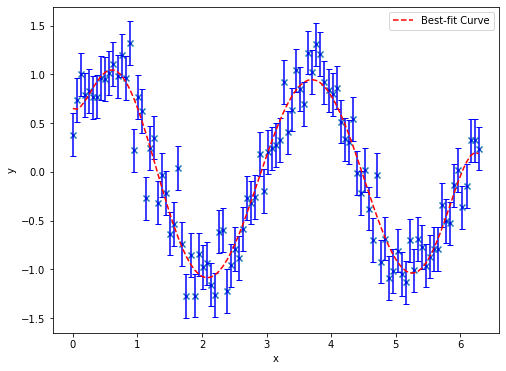

Best-fit polynomial coefficients:

chi2, chi2_nu, DOF are 106.2556, 1.0626, 100.0000 respectively.


In [7]:
plt.rcParams['figure.figsize'] = [8, 6]

#higher terms have smaller coeficients to be weighted and not have unbalanced if it is within -1 and 1, x upper bound is 2pi which is bigger to 1, this is why we want to make sure the coefficient of x^8 is smaller then coefficient x^2
# c0 = 0
# c1 = 1
# c2 = 0
# c3 = -1/6
# c4 = 0
# c5 = 1/120
# c6 =0
# c7 = -1/5040
# c8 = 0
# y_model = c0 + c1*(x**1) + c2*(x**2) + c3*(x**3) + c4*(x**4) + c5*(x**5) + c6*(x**6) + c7*(x**7) + c8*(x**8)
def poly(x, c8, c7, c6, c5, c4, c3, c2, c1, c0):
    return c0 + c1*(x**1) + c2*(x**2) + c3*(x**3) + c4*(x**4) + c5*(x**5) + c6*(x**6) + c7*(x**7) + c8*(x**8)

y = sinusoid(x, k, phi) #+ y_model
x_data = x
y_noise = totalerr * np.random.normal(size=x_data.size)
y_data = y + y_noise

# print(y)
popt, pcov = sp.curve_fit(poly, x_data, y_data)

best_fit = np.array([])

for i in range(len(popt)):
    best_fit = np.append(best_fit, popt[i])
    
y_model = np.polyval(best_fit, x_data)


plt.scatter(x_data, y_data, marker='x')
plt.errorbar(x_data, y_data, yerr = totalerr, fmt = 'ob', ms = 1, capsize = 3)

params, _ = sp.curve_fit(sinusoid, x_data, y_data, maxfev=1000)
# print(params, _)
# print(params[0], params[1])

#plt.plot(x_data, sinusoid(x_data, params[1], params[0]), label='Best-fit Curve')
plt.plot(x_data, y_model, 'r--', label='Best-fit Curve')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

chi2 = ((y_data - y)**2/totalerr**2).sum()
N = len(y_true)
n=2
# # n = number of fitting parameters, if chi2 around 1, then n=1
n = 1
DOF = N - n
chi2_nu = chi2/DOF
#do reduced chi2 for 2 models, make sure they both gives you close to 1

#Program output:
np.set_printoptions(formatter={'float': '{:.3f}'.format})
print("Best-fit polynomial coefficients:")
#array with proper formatting
print()
print("chi2, chi2_nu, DOF are {:.4f}".format(chi2)+", {:.4f}".format(chi2_nu) + ", {:.4f}".format(DOF) +" respectively.")



In [13]:
# def y_fun(c):
#     return c * (x**c)
c = np.linspace(0, 8, 9)
y_model = 0
for _ in c:
    y_model += c * (x**c)
#y_model = y_fun(c)

y_model = c0
#reduced chi2 should be closed to 1

ValueError: operands could not be broadcast together with shapes (101,) (9,) 

In [ ]:
params, _ = sp.curve_fit(sinusoid, x, y_true)
#initial guesses



0.12709601707687707 2.7395618795435057
[[0.001 -0.005]
 [-0.005 0.019]]
2


TypeError: 'int' object is not iterable

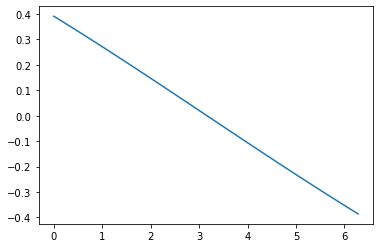

In [80]:
#fitting parameters {ci}
# find the best fit k and phi
def f(x, k, phi):
    #return m * x + b
    #return a*np.exp(-b*x**2)
    return np.sin((k*x) + phi)
    
# ydata = f(x, N) + eps
#y=f(x, )
popt, pcov = sp.curve_fit(sinu)
print(*popt)
#popt are optimal values
print(pcov)

plt.plot(x, f(x, *popt))
#reduced chi2
print(popt.size)
y_model = x
for i in x.size:  
    y_model[i] = popt*(x**i)
    



B) Alternative Model Fitting

Once the data have been simulated, let’s pretend to forget everything about the simulation
process and instead imagine that someone has just handed us a set of measurement results, stored
in a numpy array y.

First, suppose you guess (in this case correctly) that the underlying signal is sinusoidal and
construct such a model. You can then used scipy.optimize.curve_fit to find the bestfit
k and φ, along with the variance associated with each fitting parameter.
However, you may wonder whether one can fit more than one model to the data. For example,
you know that a polynomial of a high order can also “wiggle” up and down, and you would like
to see if such a model can fit the data well, with a reduced χ2 around 1. Suppose you decide to
try an 8th order polynomial:

$$ ymodel=c0 + c1x + c2x2 + c3x3 + c4x4 + c5x5 + c6x6 + c7x7 + c8x8 $$

For this model, obviously, the {ci} are the fitting parameters. Use
scipy.optimize.curve_fit to determine the best-fit {ci}. Also find the reduced χ2.
You should also plot the data, with error bars, along with the the best-fit polynomial.

In [ ]:

minRSS=100
#currentRSS=0
def f(x, k, phi):
    #return m * x + b
    #return a*np.exp(-b*x**2)
    return np.sin((k*x) + phi)

for a in np.arange(0, 10, 0.1):
    for b in np.arange(0, 100, 0.1):
        y_model=f(a, b, x)
        currentRSS=((y-y_model)**2).sum()
        if (currentRSS < minRSS):
            minRSS=currentRSS
            bestm=a
            bestb=b

Best-fit polynomial coefficients:
[1.013 1.137]


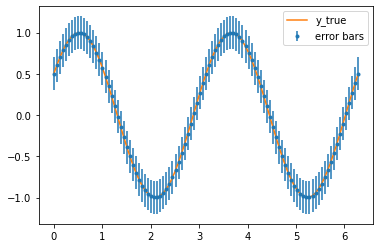

In [38]:


#Program output:
np.set_printoptions(formatter={'float': '{:.3f}'.format})
print("Best-fit polynomial coefficients:")
#array with proper formatting
print(popt)
# print("chi2, chi2_nu, DOF are {:.4f}".format(chi2)+", {:.4f}".format(chi2_nu) + "{:.0f}".format(DOF) +"respectively.")

plt.errorbar(x, y_true, yerr=sig, fmt='.', label='error bars',  ms=6, capsize=3)
plt.plot(x, f(k_best, phi_best, x), 'k-')
plt.xlabel('x')
plt.ylabel('y_true')
plt.show()